# **Predicting Wine Quality**

This notebook presents [data](https://drive.google.com/file/d/1W1AKDTQUlMw_dCIY7Gr3KQavijfw3whS/view?usp=sharing) that has the potential to predict mobile phone prices. I use linear regression to find out how.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
a = pd.read_csv('WineQT.csv')
a.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [ ]:
a.shape   #rows and columns

(1143, 13)

In [ ]:
a.info()  #information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
a.describe()   #statistical information about the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
a.isnull().sum()    #there are no null values in the dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [ ]:
# adding one more column based on wine quality
a['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
a['goodquality'] = [1 if x>= 6 else 0 for x in a['quality']]  #Based on quality parameter now im adding a new column good quality if >= 6 its a good qulity wine and less than that it is 0 bad quality
a.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8,1
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10,0


In [ ]:
a.tail()  #it returns the last 5 rows of the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,goodquality
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592,1
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593,1
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594,0
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595,1
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597,0


In [ ]:
# renaming a lenghty column

a.rename(columns ={'free sulfur dioxide':'free SO2','total sulfur dioxide':'total SO2'},inplace = True)
a          #here the chemical compound formula of sulfur dioxide is SO2 so replaced with inplace to make it permanent

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free SO2,total SO2,density,pH,sulphates,alcohol,quality,Id,goodquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592,1
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593,1
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594,0
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595,1


In [ ]:
# removing the id row

a.drop('Id',inplace = True,axis = 1)   #id row is removed from the dataset
a.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free SO2,total SO2,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,0


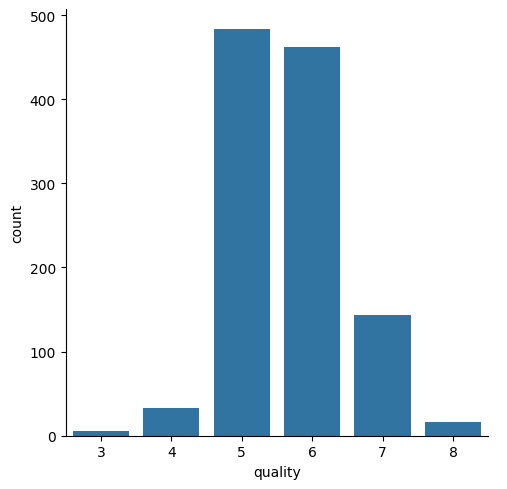

In [ ]:
sns.catplot(x = 'quality', data = a,kind = 'count')  #if the quality values is less then it is bad quality one here we have 6 quality values
plt.show()

<Axes: xlabel='quality', ylabel='volatile acidity'>

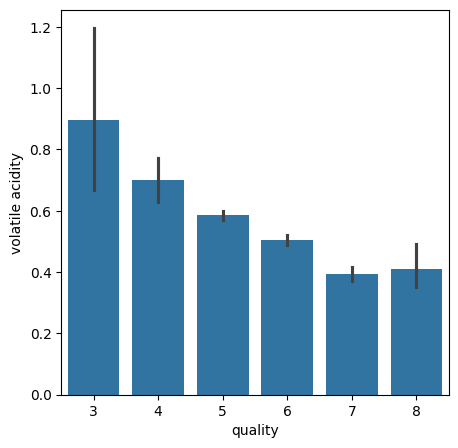

In [ ]:
plot = plt.figure(figsize =(5,5)) #volatile acidit vs quality
sns.barplot(x = 'quality',y = 'volatile acidity', data = a) #volatile acidity and wine is inversely proportional if Volatile acidity is high quality is low

<Axes: xlabel='quality', ylabel='citric acid'>

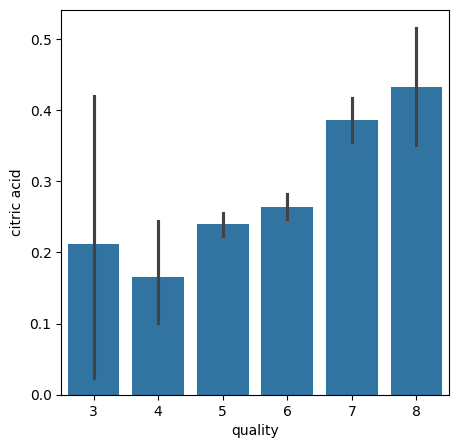

In [ ]:
plot = plt.figure(figsize =(5,5)) #citric acid vs quality   #opoposite to volatile acidity and citric acid is directly propotional to quality
sns.barplot(x = 'quality',y = 'citric acid', data = a)  #if citric acid content is more we get high quality of wine


In [ ]:
correlation = a.corr()

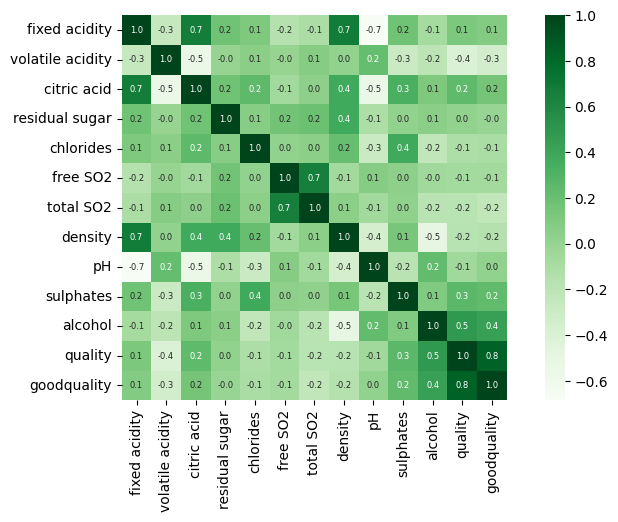

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation,cbar = True,square = True, fmt ='.1f',annot = True,annot_kws ={'size':6},cmap = 'Greens')
plt.show()    #color bar gives how much correlated the values are and format which is 1 floating values , annotation are the values like citric acid,fixed acidity...all and last one color i want is green

****This color bar gives how much correlated the values are and -0.6 to -0.2 negative values are with in light color.Goodquality and quality which is 0.8 positively correlated and quality & volatile acid is-0.4 negatively correlated****:

[Text(0.5, 1.0, 'Quality Vs Goodquality positive correlation')]

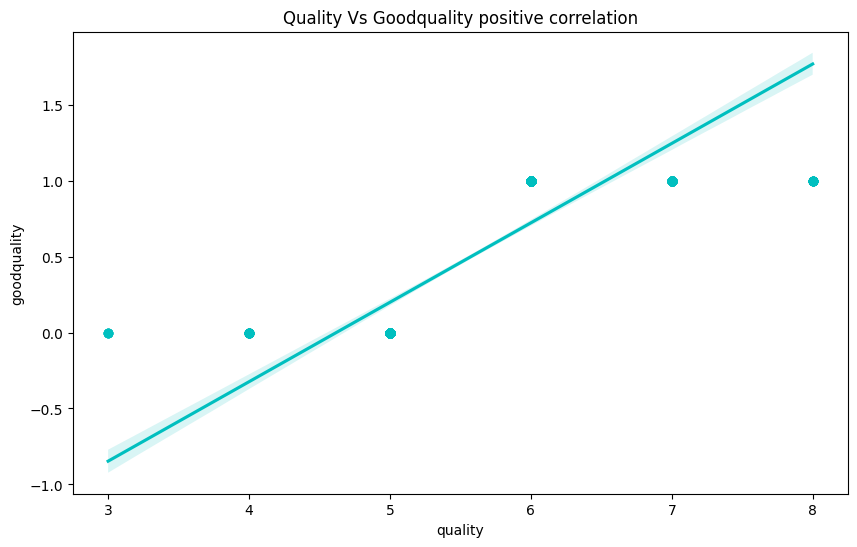

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data = a,y= "goodquality",x = "quality", color = "c").set(title ="Quality Vs Goodquality positive correlation")

In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'total SO2', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [ ]:
# split the data into features and target
X = data.drop('quality', axis=1)
y = data['quality']

In [ ]:
# scale the data to be in the same range
from sklearn.preprocessing import MinMaxScaler
# create an object of the scaler
scaler = MinMaxScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
# split the data into Training and test
from sklearn.model_selection import train_test_split


# split the data

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=101)

In [ ]:
# let build the model
from sklearn.linear_model import LinearRegression

# make a model instance
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# lets make predictions and determine our model accurancy
from sklearn.metrics import mean_absolute_error

# make some Prediction in the model
y_pred = model.predict(X_test)

# plot the predicted values with the test values
mean_abo_err = mean_absolute_error(y_test, y_pred)
print(mean_abo_err)

# mean error score
mean_error_score = np.sqrt(mean_absolute_error(y_test, y_pred))
print(mean_error_score)


# print the model score to predict the values
print(model.score(X_test, y_test) * 100)

0.45984758624627914
0.6781206280937626
38.976092309688696


In [ ]:
# saving the model using joblib
import joblib
joblib.dump(model, 'winequality_model.joblib')

['winequality_model.joblib']

In [ ]:
# loading the model to make predictions
# nake a prediction for one house just
row_index = 20
single_row = X_test[[row_index]]


new_value = model.predict(single_row)
print(single_row)

# first prediction of one house
print("another value", new_value)

# New input data
new_data = np.array([[5, 40.8765, 1200.89, 29.093456, 3, 89, 0, 0, 0, 0, 0]])

# Scale the new data using the fitted scaler
new_data_scaled = scaler.transform(new_data)

# Alternatively, if you want to make a
another_value = model.predict(new_data_scaled)

print("another : ", another_value)


[[0.0619469  0.23972603 0.11       0.0890411  0.06010017 0.29328622
  0.12848752 0.62992126 0.32934132 0.8       ]]
another value [6.73984829]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: X has 11 features, but MinMaxScaler is expecting 10 features as input.

In [ ]:
!pip install asyncio uvicorn fastapi

In [ ]:
import asyncio
import uvicorn
from typing import Annotated
from fastapi import FastAPI, Depends, HTTPException, status, Path
from pydantic import BaseModel, Field

app = FastAPI()

class WineQRequest(BaseModel):
    fixed acidity: float = Field(gt=0, lt=10000)
    volatile acidity: float = Field(gt=0, lt=10000)
    citric acid: float = Field(gt=0, lt=10000)
    residual sugar: float = Field(gt=0, lt=10000)
    chlorides: float = Field(gt=0, lt=10000)
    total SO2: float = Field(gt=0, lt=10000)
    density: float = Field(gt=0, lt=10000)
    pH: float = Field(gt=0, lt=10000)
    sulphates: float = Field(gt=0, lt=10000)
    alcohol: float = Field(gt=0, lt=10000)
    goodquality: int = Field(gt=0, lt=500)


@app.get("/", status_code=status.HTTP_200_OK)
async def get_hello():
    return {"hello": "summative yeey"}

@app.post('/predict', status_code=status.HTTP_200_OK)
async def make_prediction(wineq_request: WineQRequest):
    try:
        single_row = [[wineq_request.fixed acidity, wineq_request.volatile acidity, wineq_request.citric acid, wineq_request.residual sugar, wineq_request.chlorides, wineq_request.total SO2, wineq_request.density, wineq_request.pH, wineq_request.sulphates, wineq_request.alcohol, wineq_request.goodquality]]
        new_data_scaled = scaler.transform(single_row)
        new_value = model.predict(new_data_scaled)
        return {"predicted Quality ": new_value[0]}
    except:
        raise HTTPException(status_code=500, detail="Something went wrong.")



if __name__ == "__main__":
    config = uvicorn.Config(app)
    server = uvicorn.Server(config)
    await server.serve()